In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler


In [3]:
norm_tpm = pd.read_csv('tables/scone_norm_tpm.tab.gz', sep='\t', index_col=0)
rd_old = pd.read_csv('~/data_sc_regulation/data_autocorrelation/song/rd_pc2.tab', sep='\t', index_col=0)
norm_tpm = norm_tpm[rd_old.index]

In [4]:
meta = pd.read_csv('../SraRunTable.txt.gz', sep='\t', index_col=7).loc[rd_old.index]


In [9]:
high_expression = norm_tpm.index[norm_tpm.mean(axis=1) >= 0.1]
fano = (norm_tpm.loc[high_expression].var(axis=1)/norm_tpm.loc[high_expression].mean(axis=1)).sort_values()
pca_norm_tiklova = PCA(n_components=30)

scaled_counts = pd.DataFrame(StandardScaler().fit_transform(norm_tpm.loc[fano.index[-1000:]].T).T,
                             index = fano.index[-1000:], columns = norm_tpm.columns)

# pca_norm_tiklova = pca_norm_tiklova.fit(norm_tpm.loc[var_genes & norm_tpm.index].T)

# pca_norm_tiklova = pca_norm_tiklova.fit_transform(norm_tpm.loc[var_genes & norm_tpm.index].T)

pca_norm_tiklova = pca_norm_tiklova.fit_transform(scaled_counts.T)


rd = pd.DataFrame()
for i in range(30):
    rd['PC_' + str(i+1)] = pca_norm_tiklova.T[i]

rd.index = norm_tpm.columns
rd.PC_1 = -rd.PC_1
rd.PC_2 = -rd.PC_2


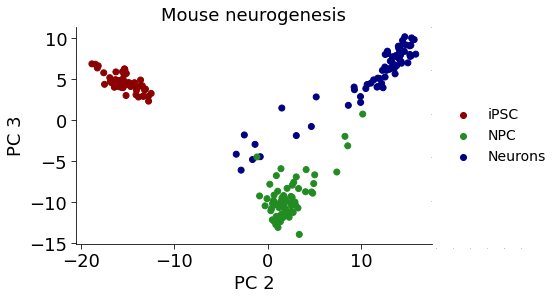

In [10]:
from matplotlib import pyplot as plt
colores = []
for cell in meta.loc[rd.index].cell_type_s:
    if cell == 'Skin fibroblast-derived induced pluripotent cells (iPSCs)':
        colores.append('darkred')
    if cell == 'iPSC-derived neural progenitor cells':
        colores.append('forestgreen')
    if cell == 'iPSC-derived motor neurons':
        colores.append('navy')
        
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8, 4))
gs = GridSpec(1,5)
gs.update(wspace=0.05, hspace=0.10)
ax = fig.add_subplot(gs[0,0:4])
ax_2 = fig.add_subplot(gs[0,4])
ax.scatter(rd.PC_1, rd.PC_2, c=colores)
ax.tick_params(labelsize=18, length=5)
ax.set_title('Mouse neurogenesis', fontsize=18)
ax.set_xlabel('PC 2', fontsize=18)
ax.set_ylabel('PC 3', fontsize=18)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax_2.scatter([-1], [0], c='darkred', label='iPSC')
ax_2.scatter([0], [0], c='forestgreen', label='NPC')
ax_2.scatter([0], [0], c='navy', label='Neurons')
ax_2.spines["right"].set_visible(False)
ax_2.spines["top"].set_visible(False)
ax_2.spines["bottom"].set_visible(False)
ax_2.spines["left"].set_visible(False)
ax_2.tick_params(labelsize=0, length=0, which='both')
ax_2.set_xlim([2, 3])
ax_2.set_ylim([2, 3])
ax_2.legend(frameon=False, fontsize=14, loc='center left')

In [12]:
# rd[['PC_1', 'PC_2']].to_csv('tables/pc2_rd.tab.gz', sep='\t', index=True, header=True)

# SE = pd.read_csv('../pipeline_output/SE_counts.tab.gz', sep='\t', index_col=0)[rd.index]
# SE.to_csv('../pipeline_output/SE_counts.tab.gz', sep='\t', index=True, header=True)

# tpm = pd.read_csv('../pipeline_output/rsem_gene_tpm.tab.gz', sep='\t', index_col=0)[rd.index]
# tpm.to_csv('../pipeline_output/rsem_gene_tpm.tab.gz', sep='\t', index=True, header=True)

# CI = pd.read_csv('../pipeline_output/constitutive_introns.tab.gz', sep='\t', index_col=0)[rd.index]
# CI.to_csv('../pipeline_output/constitutive_introns.tab.gz', sep='\t', index=True, header=True)

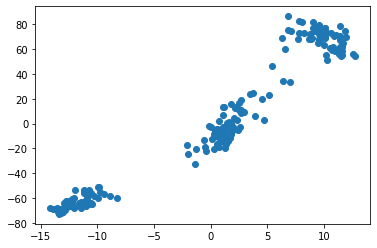

In [70]:
rd_old = pd.read_csv('~/data_sc_regulation/data_autocorrelation/song/rd_pc2.tab', sep='\t', index_col=0)
plt.scatter(rd.loc[rd_old.index].PC_1, rd_old.PC_1)

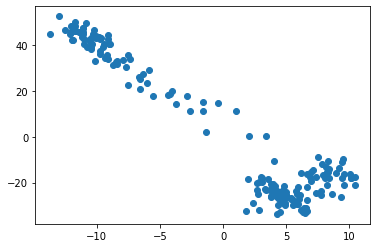

In [58]:
plt.scatter(rd.loc[rd_old.index].PC_2, rd_old.PC_2)

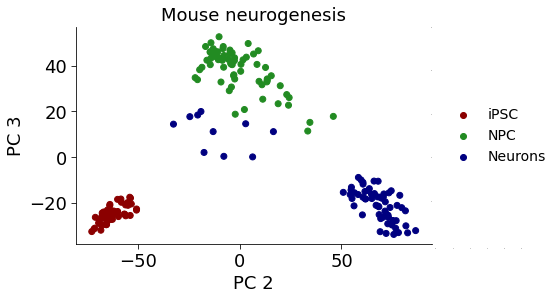

In [59]:
from matplotlib import pyplot as plt
colores = []
for cell in meta.loc[rd_old.index].cell_type_s:
    if cell == 'Skin fibroblast-derived induced pluripotent cells (iPSCs)':
        colores.append('darkred')
    if cell == 'iPSC-derived neural progenitor cells':
        colores.append('forestgreen')
    if cell == 'iPSC-derived motor neurons':
        colores.append('navy')
        
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8, 4))
gs = GridSpec(1,5)
gs.update(wspace=0.05, hspace=0.10)
ax = fig.add_subplot(gs[0,0:4])
ax_2 = fig.add_subplot(gs[0,4])
ax.scatter(rd_old.PC_1, rd_old.PC_2, c=colores)
ax.tick_params(labelsize=18, length=5)
ax.set_title('Mouse neurogenesis', fontsize=18)
ax.set_xlabel('PC 2', fontsize=18)
ax.set_ylabel('PC 3', fontsize=18)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax_2.scatter([-1], [0], c='darkred', label='iPSC')
ax_2.scatter([0], [0], c='forestgreen', label='NPC')
ax_2.scatter([0], [0], c='navy', label='Neurons')
ax_2.spines["right"].set_visible(False)
ax_2.spines["top"].set_visible(False)
ax_2.spines["bottom"].set_visible(False)
ax_2.spines["left"].set_visible(False)
ax_2.tick_params(labelsize=0, length=0, which='both')
ax_2.set_xlim([2, 3])
ax_2.set_ylim([2, 3])
ax_2.legend(frameon=False, fontsize=14, loc='center left')